# Лабораторная работа 4.15. Закон Кюри-Вейса

##  Введение и краткая теория

Рассмотрим вещества с отличными от нуля атомными магнитными моментами(парамагнетики). Во внешнем магнитном поле они будут стараться выстроиться вдоль него, но этому будет препятствовать тепловое хаотическое движение частиц. Поэтому логично, что чем больше температура, тем хуже будет вещество реагировать на внешнее МП (то есть магнитная восприимчивость убывает). Убывает по закону, называемому закон Кюри:  
<center>$\chi = \large \frac{C}{T}$</center>  
Видно, что при $T \rightarrow$ 0 восприимчивать неограниченно возрастает. То есть это особая точка, когда при сколь угодно малом поле магнитные моменты спокойно выстраиваются по нему.
Оказывается, что в ферромагнитах это происходит при понижении температуры не до абсолютного нуля, а до некой $\theta_p$ (температура, близкая к температуре Кюри):  
<center>$\chi \sim \large \frac{1}{T + \theta_p}$</center>  
И это уже называется Закон Кюри-Вейса. Такая формула хорошо описывает температуры выше неё и не очень при $T \approx \theta_p$

## Установка

<img src="pict.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

Тут ничего сложного, мы просто с помощью термпары измеряем изменение температуры, а температуру гадолиния изменяем с помощью термостата. Но как же $\chi$? А вот как! Так как $\chi \sim (L - L_0)$ (изменение индуктивности), мы можем, считая период колебаний контура, как раз найте нужное нам:
<center>$\chi \sim (\tau^2 - \tau_{0}^2)$</center>
$\tau$ - период колебаний, который зависит от индуктивности

## Ход работы

Сняв нужные зависимости и построим график $f(T) = \large \frac{1}{\tau^2 - \tau_0^2}$, из которого найдём парамагнитную точку Кюри для гадолиния.

In [41]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

In [42]:
# Константы
dT = np.float64(0.5) # градусов Цельсия
k = np.float64(0.024) # град/мкВ
t0 = np.float64(9.045) # мкс

In [43]:
def open_csv(name):
    file = pd.read_csv(name)
    file = file.drop(0)
    for col in file.columns:
        file[col] = [i if type(i) != type('a') else float('.'.join(i.split(','))) for i in file[col]]
        file[col] = [np.float64(i) for i in file[col]]
    return file

In [44]:
def chart(file, name = '', is_extr=False, ind_from = 0, ind_to = 10000, step = 1):
    # Строим график
    fig = plt.figure(figsize=(10, 6))  # (Размер графика)
    plt.title(name, fontsize=16)
    plt.grid(True)

    plt.xlabel('Температура образца, К', fontdict=dict(size=12))
    plt.ylabel(r'$\tau^2 - \tau_0^2$, $мкс^2$', fontdict=dict(size=12))
    
    x = np.array(file[file.columns[0]])  
    y = np.array(file[file.columns[1]])
    
    if (is_extr): # если нужна экстраполяция
        
        x_for_extr = file[file.columns[0]][ind_from:ind_to:]
        y_for_extr = file[file.columns[1]][ind_from:ind_to:]
        # Прямая по МНК
        A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
        a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
        x_extr = np.linspace(0.97* x_for_extr.min(), x_for_extr.max(), 10)
        # a - коэффициент наклона прямой, b - свободный член
        plt.plot(x_extr, a*x_extr + b, 'r', label='Приближающая прямая')
        plt.plot(x,y)
        
         #Определим погрешности коэффициентов a и b для 1 графика
        x_avg = np.average(x_for_extr)
        y_avg = np.average(y_for_extr)
        x_sqr_avg = np.average([i**2 for i in x_for_extr])
        y_sqr_avg = np.average([i**2 for i in y_for_extr])
        a_err = (((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x_for_extr))**0.5
        b_err = a_err * (x_sqr_avg - x_avg**2)**0.5
        
        return (a, b, a_err, b_err)
        
    plt.plot(x,y)

Оценим допустимую ЭДС образца по формуле $ \mathscr{E} = \frac{\Delta T}{k}$

In [45]:
E = np.float64(dT/k)
print('Допустимое ЭДС:', E.round(3), 'мкВ')

Допустимое ЭДС: 20.833 мкВ


Исследуем зависимость периода колебаний генератора от температуры образца

In [46]:
table1 = open_csv('point.csv')
table1[table1.columns[0]] = table1[table1.columns[0]] + 273.15
table1

,"$T_0$, К","$U$, мкВ","$\tau$, мкс"
1,289.24,6.0,10.681
2,291.20,10.0,10.550
3,293.21,10.0,10.277
4,295.23,7.0,9.861
5,297.25,6.0,9.542
6,299.19,11.0,9.423
7,301.20,11.0,9.342
8,303.23,7.0,9.284
9,305.17,12.0,9.257
10,307.23,9.0,9.226


Рассчитаем температуру образца $T$, учитывая показания термопары

In [52]:
table1['$T$, К'] = [np.float64(x - y * k).round(2) for x, y in zip(table1['$T_0$, К'], table1['$U$, мкВ'])]
table1[r'$\tau^2 - \tau_0^2$, мкс'] = [np.float64(x**2 - t0**2).round(2) for x in table1[table1.columns[2]]]
table2 = pd.DataFrame({'$T$, К': table1['$T$, К'], r'$\tau^2 - \tau_0^2$, $мкс^2$': table1[r'$\tau^2 - \tau_0^2$, мкс']})

In [53]:
table3 = table2
table3[r'$\tau^2 - \tau_0^2$, $мкс^2$'] = 1/table3[r'$\tau^2 - \tau_0^2$, $мкс^2$']
table3.rename(columns={r'$\tau^2 - \tau_0^2$, $мкс^2$': r'$\frac{1}{\tau^2 - \tau_0^2}$, $мкс^{-2}$'}, inplace=True)
table3

,"$T$, К","$\frac{1}{\tau^2 - \tau_0^2}$, $мкс^{-2}$"
1,289.10,0.030989
2,290.96,0.033910
3,292.97,0.042017
4,295.06,0.064809
5,297.11,0.108225
6,298.93,0.143266
7,300.94,0.183150
8,303.06,0.228311
9,304.88,0.257732
10,307.01,0.302115


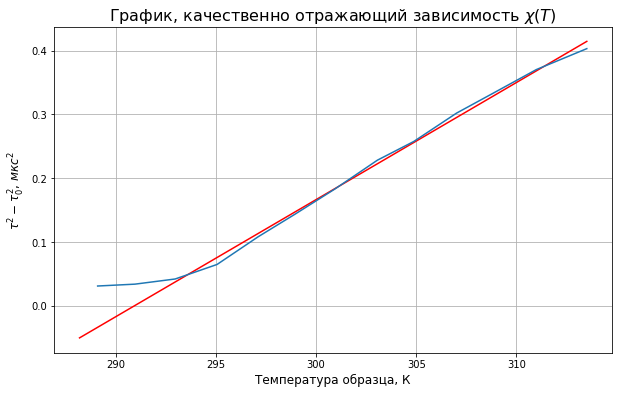

In [37]:
koef = chart(table3, r'График, качественно отражающий зависимость $\chi(T)$', True, 4)

In [38]:
Tk = np.float64(-koef[1]/koef[0])
Tk_err = np.float64(((koef[2]/koef[0])**2 + (koef[3]/koef[1])**2)**0.5).round(2)
print('Парамагнитная точка Кюри: ', Tk.round(2), '±', Tk_err,'К')

Парамагнитная точка Кюри:  290.94 ± 0.02 К


## Результаты и выводы

Экмперимент показал справедливость закона Кюри-Вейса, чего стоит один только график (красивый). Также мы нашли точку Кюри для гадолиния и она в рамках погрешности совпадает с табличной ($\approx$ 290 К).  
Считаю Эксперимент проведён успешно!